<a href="https://colab.research.google.com/github/RobbySoze/Project-1/blob/main/Skin_Cancer_ML_Project_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem definition:

The problem being solved with this model is skin cancer detection. The goal is to develop a deep learning algorithm that can classify images of skin lesions as either malignant or benign. Skin cancer is one of the most common types of cancer, and early detection can improve the chances of successful treatment. Therefore, an accurate and efficient method for skin cancer detection is crucial.

2.  Data collection:

The dataset used in this code was collected from the International Skin Imaging Collaboration (ISIC) archive. The ISIC archive is a public repository of dermatology images that is used for research purposes. The dataset consists of images of skin lesions that have been labeled as either malignant or benign by dermatologists.

3. Model Selection and Implementation:

The selected deep learning algorithm is Convolutional Neural Network (CNN). CNN is a popular algorithm for image classification tasks due to its ability to extract important features from images using convolutional layers. The implementation of the CNN involves several steps. First, two image generators are created using the Keras ImageDataGenerator class for data augmentation. The train_datagen generator applies various transformations to the training images, such as rotation, shifting, shearing, zooming, and flipping, while the test_datagen generator only applies a rescaling transformation. The purpose of these generators is to generate augmented images on the fly during training, which increases the size of the training set and improves the model's ability to generalize to new images.

Next, the train set and test set are generated using the flow_from_directory method of the ImageDataGenerator class. These sets are generated by reading images from the train_dir and test_dir directories and resizing them to a uniform size of (img_width, img_height). The class_mode argument is set to 'categorical' because the target variable has two classes, and the labels are one-hot encoded.

After generating the data sets, the CNN architecture is defined using the Keras Sequential model. The model consists of four convolutional layers followed by max pooling layers, a flatten layer, a dropout layer, and two dense layers. The convolutional layers use filters to extract features from the input images, and the max pooling layers reduce the dimensionality of the output feature maps. The flatten layer converts the 3D feature maps into a 1D vector, which is fed into the fully connected layers. The dropout layer randomly drops out some of the neurons during training to prevent overfitting. The final dense layer has two units and uses the softmax activation function to output the predicted probabilities for the two classes.

The model is compiled using the 'adam' optimizer, the 'categorical_crossentropy' loss function, and the 'accuracy' metric. The Adam optimizer is an efficient algorithm that updates the network weights based on the gradient of the loss function. The categorical cross-entropy loss function is used because the problem involves multi-class classification, and the accuracy metric is used to evaluate the performance of the model during training and testing.

Finally, the model is trained using the fit method of the model object. The fit method takes the train_set as input and trains the model for the specified number of epochs using the backpropagation algorithm. The steps_per_epoch and validation_steps arguments are set to the number of training and testing images divided by the batch size, respectively. The early stopping callback is also used to prevent overfitting by monitoring the validation loss and stopping the training process if the validation loss does not improve for three consecutive epochs.

4. Model evaluation and interpretation:

The test accuracy of the model is 0.4757 or 47.57%, which is quite low. This indicates that the model is not very good at correctly classifying the images in the test set.

The precision and recall for each class indicate that the model is better at correctly classifying malignant images than benign images. The precision of the malignant class is 0.45, which means that out of all the images the model predicted to be malignant, only 45% of them were actually malignant. The recall of the malignant class is 0.63, which means that out of all the actual malignant images, the model correctly identified 63% of them. The precision of the benign class is 0.53, which means that out of all the images the model predicted to be benign, only 53% of them were actually benign. The recall of the benign class is 0.35, which means that out of all the actual benign images, the model correctly identified only 35% of them.

The f1-score is a metric that takes into account both precision and recall, and it is a good overall metric for evaluating the performance of the model. The f1-score for the malignant class is 0.52, which is higher than the f1-score for the benign class, which is 0.42. This is consistent with the precision and recall results, which indicate that the model is better at correctly classifying malignant images than benign images.

The overall accuracy of the model is not very high, which suggests that the model may not be very effective at distinguishing between the two classes. The precision and recall values also suggest that the model may be biased towards one class (in this case, the "Malignant" class), which could be due to class imbalance in the dataset. Further analysis and modifications to the model may be necessary to improve its performance.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from google.colab import files
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.utils import img_to_array
from zipfile import ZipFile
import random
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")
from keras.preprocessing import image

In [ ]:
# Upload dataset
!gdown --id 1Kh-GA0859jiN2WJLah5EFR_dY8SgaoKh

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Kh-GA0859jiN2WJLah5EFR_dY8SgaoKh
To: /content/skin_cancer.zip
100% 340M/340M [00:03<00:00, 89.8MB/s]


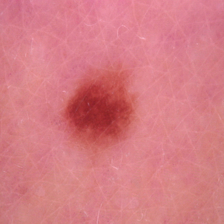

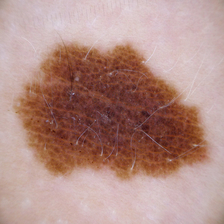

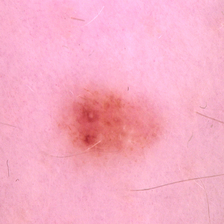

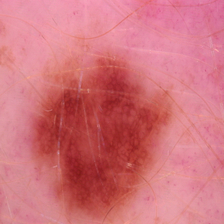

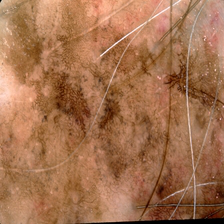

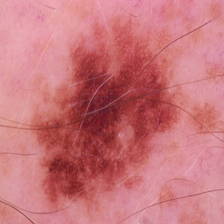

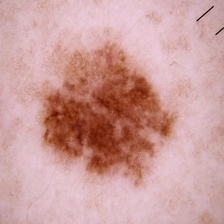

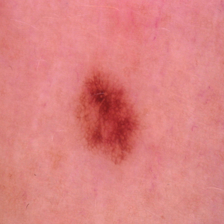

In [ ]:
# Open the ZIP file containing the images
with ZipFile('skin_cancer.zip', 'r') as zip:
    # Get a list of all the image filenames
    filenames = zip.namelist()

    # Choose a few random filenames to display
    chosen_filenames = random.sample(filenames, 8)

    # Display each chosen image
    for filename in chosen_filenames:
        # Open the image file within the ZIP file
        with zip.open(filename) as image_file:
            # Open the image using Pillow
            image = Image.open(image_file)

            # Display the image
            image.show()

In [ ]:
# Set paths to training and test sets
train_dir = 'skin_cancer/train'
test_dir = 'skin_cancer/test'

In [ ]:
# Define image dimensions
img_width, img_height = 224, 224

In [ ]:
# Create image generators for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generate training and test sets
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(img_width, img_height),
                                              batch_size=80,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=80,
                                            class_mode='categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
# Get a batch of images from the test set
images, labels = next(test_set)

In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_set,
                    steps_per_epoch=train_set.samples // train_set.batch_size,
                    epochs=50,
                    validation_data=test_set,
                    validation_steps=test_set.samples // test_set.batch_size,
                    callbacks=[early_stop])


Epoch 1/50
32/32 [==============================] - 343s 11s/step - loss: 0.7147 - accuracy: 0.6203 - val_loss: 0.5742 - val_accuracy: 0.6375
Epoch 2/50
32/32 [==============================] - 336s 10s/step - loss: 0.5472 - accuracy: 0.7200 - val_loss: 0.4948 - val_accuracy: 0.7359
Epoch 3/50
32/32 [==============================] - 335s 10s/step - loss: 0.4889 - accuracy: 0.7560 - val_loss: 0.4327 - val_accuracy: 0.7828
Epoch 4/50
32/32 [==============================] - 355s 11s/step - loss: 0.4411 - accuracy: 0.7786 - val_loss: 0.3888 - val_accuracy: 0.7859
Epoch 5/50
32/32 [==============================] - 333s 10s/step - loss: 0.4409 - accuracy: 0.7790 - val_loss: 0.4015 - val_accuracy: 0.7844
Epoch 6/50
32/32 [==============================] - 333s 10s/step - loss: 0.4052 - accuracy: 0.7880 - val_loss: 0.4190 - val_accuracy: 0.7844
Epoch 7/50
32/32 [==============================] - 334s 10s/step - loss: 0.4280 - accuracy: 0.7798 - val_loss: 0.4411 - val_accuracy: 0.7953


In [ ]:
# Save model
model.save('skin_cancer_model.h5')

Text(0.5, 1.0, 'Training and Validation Loss')

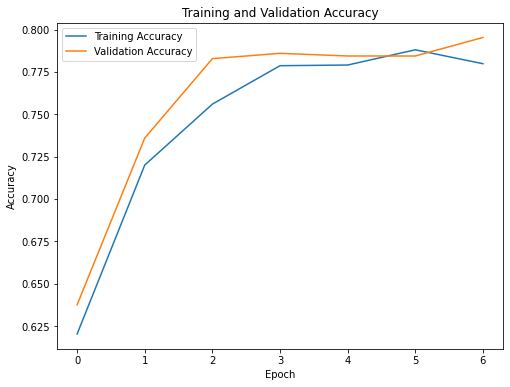

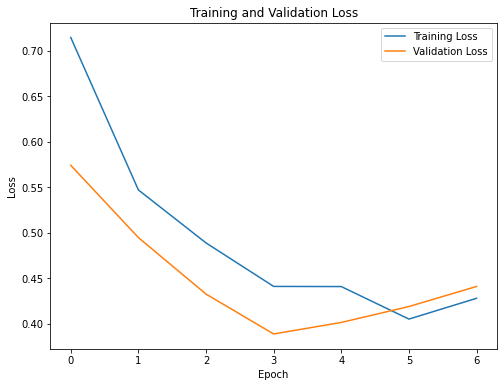

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')



In [ ]:
# Load saved model
model = load_model('skin_cancer_model.h5')

# Define image dimensions
img_width, img_height = 224, 224

# Load image and convert to array
img_path = 'skin_cancer/test/benign/15.jpg'
img = Image.open(img_path).resize((img_width, img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make prediction
prediction = model.predict(x)

# Print predicted class
if prediction[0][0] > prediction[0][1]:
    print('Benign')
else:
    print('Malignant')


1/1 [==============================] - 0s 153ms/step
Benign


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load a random image from the test set
random_image_path = np.random.choice(test_set.filepaths)
img = load_img(random_image_path, target_size=(img_width, img_height))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Use the model to predict the class of the image
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])

# Print the predicted class and the corresponding label
if predicted_class_index == 0:
    print('Prediction: Malignant')
else:
    print('Prediction: Benign')

actual_class_index = np.argmax(test_set.classes[test_set.filepaths.index(random_image_path)])
actual_label = list(test_set.class_indices.keys())[actual_class_index]

print('Actual label:', actual_label)


1/1 [==============================] - 0s 227ms/step
Prediction: Benign
Actual label: benign


In [ ]:
# Generate predictions on test set
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_set.classes

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print('Test Accuracy:', accuracy)

# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels, target_names=['Benign', 'Malignant'])
print(report)



9/9 [==============================] - 23s 3s/step
Test Accuracy: 0.47575757575757577
              precision    recall  f1-score   support

      Benign       0.53      0.35      0.42       360
   Malignant       0.45      0.63      0.52       300

    accuracy                           0.48       660
   macro avg       0.49      0.49      0.47       660
weighted avg       0.49      0.48      0.47       660



9/9 [==============================] - 24s 3s/step


Text(0.5, 1.0, 'Confusion Matrix')

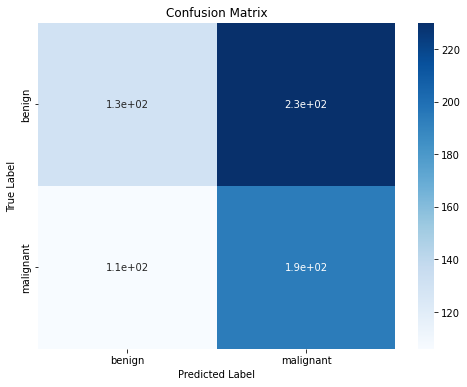

In [ ]:
# Predict classes for test set
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')